# Santander Customer Satisfaction
https://www.kaggle.com/c/santander-customer-satisfaction

In [1]:
import cPickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

1. Exploratory analysis
-----------------------

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39205.170000,0
1,3,2,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49278.030000,0
2,4,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,67333.770000,0
3,8,2,37,0,195,195,0,0,0,0,...,0,0,0,0,0,0,0,0,64007.970000,0
4,10,2,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,117310.979016,0


In [5]:
test.tail()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
75813,151831,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40243.200000
75814,151832,2,26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,146961.300000
75815,151833,2,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,167299.770000
75816,151834,2,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117310.979016
75817,151837,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117310.979016


In [4]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,117235.809430,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,182664.598503,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5163.750000,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67870.612500,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106409.160000,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,118756.252500,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,22034738.760000,1.000000


In [15]:
print plt.style.available
plt.style.use('ggplot')

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [20]:
(train['TARGET']==1).sum()

3008

## Combine train and test sets

In [3]:
## use for spltting up combined train+test data, recording predictions
labels = train['TARGET'].values
df_train = train.drop(['TARGET'], axis=1)
df_test = test.copy()
id_test = test['ID']
piv_train = train.shape[0]

In [4]:
#Creating a DataFrame with train+test data
df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)

# Removing id
# we can also remove id later
df_all = df_all.drop(['ID'], axis=1)
(df_all.isnull().sum() / df_all.shape[0])

var3                             0
var15                            0
imp_ent_var16_ult1               0
imp_op_var39_comer_ult1          0
imp_op_var39_comer_ult3          0
imp_op_var40_comer_ult1          0
imp_op_var40_comer_ult3          0
imp_op_var40_efect_ult1          0
imp_op_var40_efect_ult3          0
imp_op_var40_ult1                0
imp_op_var41_comer_ult1          0
imp_op_var41_comer_ult3          0
imp_op_var41_efect_ult1          0
imp_op_var41_efect_ult3          0
imp_op_var41_ult1                0
imp_op_var39_efect_ult1          0
imp_op_var39_efect_ult3          0
imp_op_var39_ult1                0
imp_sal_var16_ult1               0
ind_var1_0                       0
ind_var1                         0
ind_var2_0                       0
ind_var2                         0
ind_var5_0                       0
ind_var5                         0
ind_var6_0                       0
ind_var6                         0
ind_var8_0                       0
ind_var8            

In [23]:
#Filling nan
df_all = df_all.fillna(-1)
df_all_copy = df_all.copy()

---
Look at important features found here:  
https://www.kaggle.com/cast42/santander-customer-satisfaction/xgboost-with-early-stopping/code

In [15]:
# add sum of zeros per row as new feature
df_all['n0'] = (df_all ==0).sum(axis=1)

In [16]:
# look at top features
top_features = ['var38', 'var15', 'n0', 'saldo_medio_var5_ult3', 'saldo_var30', 'saldo_medio_var5_hace3', 
                'num_var45_hace3', 'saldo_medio_var5_hace2', 'num_var22_ult3', 'num_var45_ult3',
                'saldo_medio_var5_ult1', 'saldo_var42', 'saldo_var5', 'num_meses_var39_vig_ult3',
                'imp_op_var41_comer_ult3']

df_all[top_features].head()

,var38,var15,n0,saldo_medio_var5_ult3,saldo_var30,saldo_medio_var5_hace3,num_var45_hace3,saldo_medio_var5_hace2,num_var22_ult3,num_var45_ult3,saldo_medio_var5_ult1,saldo_var42,saldo_var5,num_meses_var39_vig_ult3,imp_op_var41_comer_ult3
0,39205.170000,23,355,0.00,0.00,0.00,0,0.00,0,0,0.00,0.00,0.00,2,0
1,49278.030000,34,329,0.00,300.00,88.89,0,0.00,0,0,0.00,0.00,0.00,2,0
2,67333.770000,23,340,2.07,3.00,0.18,0,3.00,0,0,3.00,3.00,3.00,1,0
3,64007.970000,37,309,138.84,70.62,0.00,3,186.09,3,48,91.56,70.62,70.62,1,195
4,117310.979016,39,319,13501.47,135003.00,0.30,0,3.00,9,0,40501.08,135003.00,0.00,2,0


---


### var38

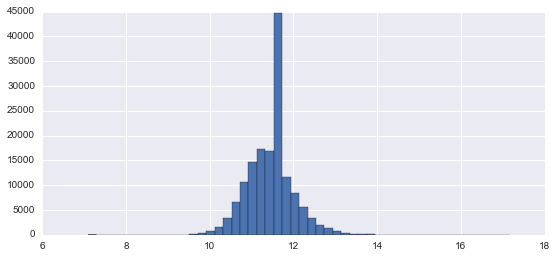

In [32]:
# look at most important feature
plt.hist(np.log(df_all['var38']), bins=50)
plt.gcf().set_size_inches(9,4)
plt.show()

---
2. Feature engineering
----------------------

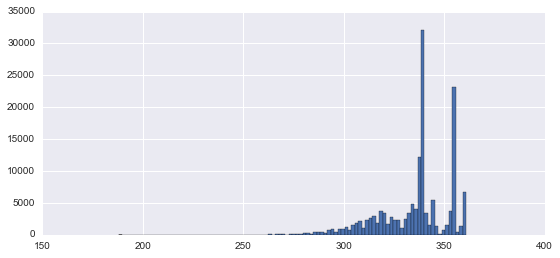

In [34]:
# look at distribution of number of zeros per row
plt.hist(df_all['n0'], bins=100)
plt.gcf().set_size_inches(9,4)
plt.show()

### TODO: PCA reduced sessions

In [ ]:
# TODO: keep user id separate
pivot_ids = pivot_uu['user_id']
pivot_uu = pivot_uu.drop('user_id', axis=1)

In [143]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=30, copy=True, whiten=False)

# fit the data
pca.fit(pivot_uu)

# Print the components and the amount of variance in the data contained in each dimension
print sum(pca.explained_variance_ratio_)
pca.explained_variance_ratio_

0.994647860711


array([  4.55784016e-01,   1.76720370e-01,   1.34333992e-01,
         1.04366961e-01,   4.46364281e-02,   2.29000872e-02,
         9.85413653e-03,   8.33610964e-03,   7.09086715e-03,
         4.94513283e-03,   3.90182942e-03,   3.07658093e-03,
         2.37547336e-03,   1.89985253e-03,   1.64290753e-03,
         1.59587043e-03,   1.49620374e-03,   1.31682851e-03,
         1.11501027e-03,   1.08507240e-03,   9.01577834e-04,
         8.74137626e-04,   7.94024601e-04,   7.27729297e-04,
         6.59200877e-04,   5.53850220e-04,   4.53780643e-04,
         4.39955814e-04,   4.01040885e-04,   3.68832672e-04])

In [144]:
events_pca = pca.transform(pivot_uu)
print events_pca.shape

(135478, 30)


In [162]:
sessions_merge = pd.concat((pd.DataFrame(events_pca), pivot_ids), axis=1)
sessions_merge.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,user_id
0,-11.552858,4.563340,-4.783074,1.423241,-0.482374,1.426581,-0.305765,-0.370464,-0.232111,-1.206425,...,0.314600,-0.434894,2.617254,1.029291,-0.037263,0.281922,0.084339,-0.141330,0.170418,00023iyk9l
1,-1.696191,3.084447,-4.693928,5.745356,-0.465075,1.943602,-1.864972,3.124069,0.138877,3.662305,...,0.043853,-0.266465,-0.461326,-0.394993,0.171884,0.112885,0.015717,0.093282,-0.176547,0010k6l0om
2,30.387948,29.140816,24.023564,-17.856232,-16.147731,-0.258195,0.627195,-3.518666,1.841621,-0.190239,...,-0.196947,-0.286164,-0.169058,0.079312,-0.416128,-0.007227,-0.167309,0.093205,-0.071878,001wyh0pz8
3,-6.891381,0.613752,-4.639629,-5.676685,-3.519701,1.321304,-0.287688,0.325089,-3.123836,-0.356795,...,-0.257453,0.636374,-0.187680,0.239828,-0.803435,0.009918,-0.499276,-0.008971,0.014002,0028jgx1x1
4,151.617184,-120.531591,143.144478,-40.109561,4.322015,13.913673,0.520738,-4.011590,6.561841,3.298432,...,6.185851,24.327351,-6.071458,14.120418,-9.333167,0.802146,-1.583475,-1.613278,4.330721,002qnbzfs5


## Train and test sets

In [35]:
#Splitting train and test
vals = df_all.values
X = vals[:piv_train]
X_test_submit = vals[piv_train:]
y = labels

** PCA-reduced data**

In [ ]:
#Splitting train and test with PCA-reduced data
vals = pd.DataFrame(pca.transform(df_all)).values
X = vals[:piv_train]
X_test_submit = vals[piv_train:]

#http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
le = LabelEncoder()
y = le.fit_transform(labels)

---
### Normalize features

In [24]:
def normalize_features(feature_matrix):
    norms = np.linalg.norm(feature_matrix, axis=0)
    normalized_features = (feature_matrix - norms/2) / norms
        
    return(normalized_features, norms)

In [322]:
#Splitting train and test and normalizing
vals_norm,_ = normalize_features(vals)
X_norm = vals_norm[:piv_train]
X_test_norm = vals_norm[piv_train:]

In [323]:
print X_norm.shape
print X_test_norm.shape

(213451, 316)
(62096, 316)


---

Split train data further into train/validation/test sets
---------------

In [36]:
from sklearn import cross_validation

** convert labels to vector**

In [27]:
y_copy = y.copy()
print y_copy.shape

(76020,)


In [232]:
# reformat labels as vector
def reformat(labels, num_labels=12):
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)  # convert label to vector
  return labels

In [233]:
## variable for new label vectors
y_vec = reformat(y_copy)
print y_vec.shape

(213451, 12)


In [237]:
## keep copy of X_test_submit
X_test_copy = X_test_submit.copy()
#X_test_submit = X_test_copy.copy()

In [329]:
## convert test submission dtype
X_test_submit = X_test_norm.astype('float32')

In [330]:
## split normalized data into train and test
X_tv, X_test, y_tv, y_test = cross_validation.train_test_split(X_norm.astype('float32'), \
                                                               y_vec.astype('float32'), test_size=.05, random_state=205)

X_train, X_valid, y_train, y_valid = cross_validation.train_test_split(X_tv, y_tv, \
                                                                       test_size=.05, random_state=71511)

In [64]:
## split into train and validation
## use X,y for full training data
X_train, X_valid, y_train, y_valid = cross_validation.train_test_split(X, y, \
                                                                       test_size=.2, random_state=415)

## Grid search
http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html  
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html

In [43]:
from sklearn import metrics
from sklearn import grid_search

## Make scorer
auc_scorer = metrics.make_scorer(metrics.roc_auc_score, greater_is_better=True)
f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, average='binary')

### i. Random forest
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [44]:
## create cv search objec
from sklearn.ensemble import RandomForestClassifier
'''
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, \
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, \
                            max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, \
                            n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
'''
#clf = RandomForestClassifier(n_estimators=100)
est = RandomForestClassifier(n_estimators=100, max_depth=None, class_weight='balanced', random_state=415)
parameters = {'min_samples_split': [2, 32]
             }
reg = grid_search.GridSearchCV(est, parameters, scoring=auc_scorer, cv=3)

### ii. SVM
http://scikit-learn.org/stable/modules/svm.html

In [ ]:
from sklearn import svm
# Setup a Classifier
clf = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, \
                  shrinking=True, probability=False, tol=0.001, cache_size=200, \
                  class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape=None, random_state=None)
# tune parameter with at least 3 settings
parameters = {'C': (1.0, 0.2),
             }

In [ ]:
## PCA reduced data
X_reduced = pca.transform(X)
X_test_reduced = pca.transform(X_test)

### iii. XGBoost
https://github.com/dmlc/xgboost/blob/master/python-package/xgboost/sklearn.py

In [132]:
#Classifier
# try using... objective: multi:softprob, rank:pairwise
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

ratio = float(np.sum(y == 1)) / np.sum(y==0)
est = XGBClassifier(max_depth=7, learning_rate=0.1, n_estimators=256,
                    objective='binary:logistic', subsample=1.0, colsample_bytree=.5, 
                    min_child_weight = 3, scale_pos_weight = ratio, seed=123)                  

param = {
    'objective':'multi:softprob',                    
    'max_depth':6, 
    'learning_rate':0.25, 
    'n_estimators':43,                 
    'subsample':0.6, 
    'colsample_bytree':0.6,
    'num_class' :12
    }

In [133]:
eval_set = [(X_train,y_train), (X_valid,y_valid)]

In [134]:
# try using... eval_metric: mlogloss, merror, ndcg@n-
est.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=50, eval_metric='auc')

Will train until validation_1 error hasn't decreased in 50 rounds.
[0]	validation_0-auc:0.500000	validation_1-auc:0.500000
[1]	validation_0-auc:0.500000	validation_1-auc:0.500000
[2]	validation_0-auc:0.500000	validation_1-auc:0.500000
[3]	validation_0-auc:0.500000	validation_1-auc:0.500000
[4]	validation_0-auc:0.500000	validation_1-auc:0.500000
[5]	validation_0-auc:0.500000	validation_1-auc:0.500000
[6]	validation_0-auc:0.500000	validation_1-auc:0.500000
[7]	validation_0-auc:0.500000	validation_1-auc:0.500000
[8]	validation_0-auc:0.500000	validation_1-auc:0.500000
[9]	validation_0-auc:0.500000	validation_1-auc:0.500000
[10]	validation_0-auc:0.500000	validation_1-auc:0.500000
[11]	validation_0-auc:0.500000	validation_1-auc:0.500000
[12]	validation_0-auc:0.500000	validation_1-auc:0.500000
[13]	validation_0-auc:0.500000	validation_1-auc:0.500000
[14]	validation_0-auc:0.500000	validation_1-auc:0.500000
[15]	validation_0-auc:0.722498	validation_1-auc:0.685326
[16]	validation_0-auc:0.722392	

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=3, missing=None, n_estimators=256, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=0.0411987070619, seed=123, silent=True,
       subsample=1.0)

**Save model for later**

In [57]:
! mkdir models

In [138]:
# save the classifier
with open('models/my_xgb_3.pkl', 'wb') as f:
    cPickle.dump(est, f)    

In [123]:
# load it again
with open('models/my_xgb_2.pkl', 'rb') as f:
    clf_loaded = cPickle.load(f)

In [124]:
est_2 = clf_loaded

3. Fit the data
---------------

In [64]:
## fit with one-hot-encoded features
est.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### 3a. Fit with grid search

In [45]:
## fit data with random forest
reg.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=415, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 32]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=make_scorer(roc_auc_score), verbose=0)

In [122]:
## get the best predictor
est = reg.best_estimator_
est

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=32,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=415, verbose=0, warm_start=False)

## Look at prediction performance

In [84]:
## predict classes
ypred = est.predict(X)

In [ ]:
# view the results, my_xgb_2
print metrics.classification_report(y, ypred)

In [85]:
# view the results, my_xgb_2
print metrics.classification_report(y, ypred)

             precision    recall  f1-score   support

          0       0.96      1.00      0.98     73012
          1       0.00      0.00      0.00      3008

avg / total       0.92      0.96      0.94     76020



In [48]:
# view the results, my_rf_1
print metrics.classification_report(y, ypred)

             precision    recall  f1-score   support

          0       1.00      0.93      0.96     73012
          1       0.35      0.90      0.50      3008

avg / total       0.97      0.93      0.94     76020



In [121]:
## predict probabilities
ypred = est.predict_proba(X)
print metrics.roc_auc_score(y, ypred[:,1])

0.96753999461


---
## Generate submission

In [135]:
## predict test, class probabilities
ypred_submit = est.predict_proba(X_test_submit)
print ypred_submit.shape

(75818, 2)


In [131]:
## predict using a second model and average the results
ypred_2 = est_2.predict_proba(X_test_submit)
ypred_avg = (.2 * ypred_submit) + (.8 * ypred_2)
ypred_avg[:10]

array([[  9.33448022e-01,   6.65520288e-02],
       [  9.62528953e-01,   3.74710348e-02],
       [  9.99925745e-01,   7.42562042e-05],
       [  9.99568772e-01,   4.31227818e-04],
       [  9.98117258e-01,   1.88275319e-03],
       [  8.86325098e-01,   1.13674911e-01],
       [  9.61121901e-01,   3.88780951e-02],
       [  8.96974891e-01,   1.03025138e-01],
       [  9.71420058e-01,   2.85799215e-02],
       [  9.89302377e-01,   1.06976180e-02]])

In [137]:
# Generate submission: stack ids and targets together into dataframe
# old --> sub = pd.DataFrame(np.column_stack(id_test, ypred_submit[:,1])), columns=['ID', 'TARGET'])
sub = pd.concat([id_test, pd.Series(ypred_submit[:,1], name='TARGET')], axis=1)
# write dataframe to csv
sub.to_csv('../submit/xgb_3_20160415.csv',index=False)

---
### Predict probability

In [60]:
## predict class probabilities
ypred_prob = est.predict_proba(X)
print ypred_prob.shape

(76020, 2)


In [62]:
pd.DataFrame(ypred_prob)[:11]

,0,1
0,0.896968,0.103032
1,0.963320,0.036680
2,0.970958,0.029042
3,0.868622,0.131378
4,0.945749,0.054251
5,0.990958,0.009042
6,0.944273,0.055727
7,0.931341,0.068659
8,0.393919,0.606081
9,0.961911,0.038089


In [162]:
## predict test, class probabilities
ypred_submit = est.predict_proba(X_test_submit)
print ypred_submit.shape

(62096, 12)


---
iv. Tensorflow
----------

> **1-2 hidden layers **<br>
> steps 5001, L2 reg .001, hidden 1024, rate (.5, 1000, .8), Test accuracy: **58.78**%<br>
> steps 9001, L2 reg .001, hidden 1024x500, keep .9, rate (.05 adagrad), Test accuracy: **58.78**%<br>
> steps 9001, L2 reg .001, hidden 1024x300, keep 1., rate (.01 adagrad), Test accuracy: **58.17**%<br>

> **1-2 hidden layers, init low w, b**<br>
> steps 5001, L2 reg .0002, hidden 1024x500, keep 1., rate (.1 adagrad), Test accuracy: **58.78**%<br>

> **3 hidden layers **<br>
> steps 9001, L2 reg .001, hidden 1024x300x50, rate (.01 adagrad), Test accuracy: **58.17**%<br>

> **PCA 40 dims **<br>
> steps 9001, L2 reg .001, hidden 1024x300x50, rate (.01 adagrad), Test accuracy: **58.17**%<br>

> **107 features (del 'first_browser') **<br>
> steps 5001, L2 reg .0002, hidden 1024x300x50, rate (.1 adagrad), Test accuracy: **58.04**%<br>

In [244]:
import tensorflow as tf

In [245]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [260]:
def weight_variable(shape, stddev=0.1):
  initial = tf.truncated_normal(shape, stddev=stddev)
  return tf.Variable(initial)

def bias_variable(shape, constant=0.):
  initial = tf.constant(constant, shape=shape)
  return tf.Variable(initial)

** Build graph**

In [248]:
print X_train.shape
print X_train.dtype
print X_valid.shape
print X_test.shape
print y_train[:3]
print y_train.shape
print y_valid.shape
print y_test.shape

print X_test_submit.shape

(192639, 316)
float32
(10139, 316)
(10673, 316)
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
(192639, 12)
(10139, 12)
(10673, 12)
(62096, 316)


In [331]:
reg_L2 = 0.0002
batch_size = 128
num_hidden_1 = 1024
#num_hidden_2 = 300
#num_hidden_3 = 50
num_features = X_train.shape[1]
num_labels = 12

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, num_features))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(X_valid)
  tf_test_dataset = tf.constant(X_test)
  tf_test_submit = tf.constant(X_test_submit)
  
  # Variables.
  w = weight_variable(shape=[num_features, num_hidden_1])
  b = bias_variable(shape=[num_hidden_1])

  #w2 = weight_variable(shape=[num_hidden_1, num_hidden_2])
  #b2 = bias_variable(shape=[num_hidden_2])

  #w3 = weight_variable(shape=[num_hidden_2, num_hidden_3])
  #b3 = bias_variable(shape=[num_hidden_3])

  w4 = weight_variable(shape=[num_hidden_1, num_labels])
  b4 = bias_variable(shape=[num_labels])
  
  # Training computation.
  def model(data):
    h = tf.nn.relu(tf.matmul(data, w) + b)
    ##Dropout
    keep_prob = tf.constant(1.)
    #h2 = tf.tanh(tf.matmul(h, w2) + b2)
    #h2_drop = tf.nn.dropout(h2, keep_prob)
    #h3 = tf.tanh(tf.matmul(h2, w3) + b3)
    #h3_drop = tf.tanh(tf.matmul(h2_drop, w3) + b3)
    #h3_drop = tf.nn.dropout(h3_drop, keep_prob)
    h4 = tf.matmul(h, w4) + b4
    return h4
  
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
  
  # L2 regularization for the fully connected parameters.
  #regularizers = tf.nn.l2_loss(w) + tf.nn.l2_loss(w4)
  # Add the regularization term to the loss.
  #loss += reg_L2 * 0.5 * regularizers
  
  # Optimizer.
  ## with learning rate decay
  ##global_step = tf.Variable(0, trainable=False) # count the number of steps taken.
  ##learning_rate = tf.train.exponential_decay(1., global_step, 500, 0.6, staircase=False)
  ##optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
  optimizer = tf.train.AdagradOptimizer(.01).minimize(loss)
  
  # Predictions for the training, validation, test, and test submission data.
  def predict(data):
    h = tf.nn.relu(tf.matmul(data, w) + b)
    #h2 = tf.tanh(tf.matmul(h, w2) + b2)
    #h3 = tf.tanh(tf.matmul(h2, w3) + b3)
    h4 = tf.matmul(h, w4) + b4
    return h4
  train_prediction = tf.nn.softmax(predict(tf_train_dataset))
  valid_prediction = tf.nn.softmax(predict(tf_valid_dataset))
  test_prediction = tf.nn.softmax(predict(tf_test_dataset))

  submit_prediction = tf.nn.softmax(predict(tf_test_submit))

** Run it**

In [332]:
num_steps = 3001
    
def step_eval():
  for step in xrange(num_steps):
    offset = (step * batch_size) % (y_train.shape[0] - batch_size)
    batch_data = X_train[offset:(offset + batch_size), :]
    batch_labels = y_train[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 300 == 0):
      #print global_step.eval(), learning_rate.eval()
      print "Minibatch loss at step", step, ":", l
      print "Minibatch accuracy: %.2f%%" % accuracy(predictions, batch_labels)
      accuracy_valid = accuracy(valid_prediction.eval(), y_valid)
      print "Validation accuracy: %.2f%%" % accuracy_valid
      print "-" * 20
      if accuracy_valid > 92.:
        print "Halted!"
        return
    if (step % 1000 == 0):
      print "Test accuracy: %.2f%%" % accuracy(test_prediction.eval(), y_test)
      print "=" * 20

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print "Initialized\n", "="*12
  step_eval()
  print "Test accuracy: %.2f%%" % accuracy(test_prediction.eval(), y_test)
  ypred_submit = submit_prediction.eval()

Initialized
Minibatch loss at step 0 : 3.26455
Minibatch accuracy: 2.34%
Validation accuracy: 58.53%
--------------------
Test accuracy: 58.78%
Minibatch loss at step 300 : 1.16833
Minibatch accuracy: 58.59%
Validation accuracy: 58.53%
--------------------
Minibatch loss at step 600 : 1.36942
Minibatch accuracy: 64.06%
Validation accuracy: 58.53%
--------------------
Minibatch loss at step 900 : 1.13909
Minibatch accuracy: 57.81%
Validation accuracy: 58.53%
--------------------
Test accuracy: 58.78%
Minibatch loss at step 1200 : 1.11844
Minibatch accuracy: 61.72%
Validation accuracy: 58.53%
--------------------
Minibatch loss at step 1500 : 1.03941
Minibatch accuracy: 64.06%
Validation accuracy: 58.53%
--------------------


KeyboardInterrupt: 

In [144]:
check = ypred_submit[2000:2004]
print check
print np.argsort(check)
for i in xrange(len(check)):
    print le.inverse_transform(np.argsort(check[i])[::-1]).tolist()

[[ 0.00275282  0.00670136  0.00510201  0.00973255  0.02230456  0.01001685
   0.01413022  0.57495332  0.00390214  0.00101802  0.30211538  0.04727076]
 [ 0.00274651  0.00668118  0.00512046  0.00975334  0.02227283  0.01004198
   0.01409889  0.57516688  0.00390226  0.00101752  0.30192763  0.04727058]
 [ 0.00273304  0.00665983  0.00510894  0.00972562  0.02229475  0.01000752
   0.01408009  0.57545155  0.00389516  0.00101317  0.30179265  0.04723767]
 [ 0.00274596  0.00669436  0.00510876  0.00974156  0.02229444  0.01002662
   0.01412156  0.57517922  0.0039057   0.00101715  0.30187249  0.04729211]
 [ 0.00274236  0.00668534  0.00511654  0.00977065  0.0222552   0.01004988
   0.01410146  0.57546836  0.00390035  0.00101695  0.30169925  0.0471937 ]]
[[ 9  0  8  2  1  3  5  6  4 11 10  7]
 [ 9  0  8  2  1  3  5  6  4 11 10  7]
 [ 9  0  8  2  1  3  5  6  4 11 10  7]
 [ 9  0  8  2  1  3  5  6  4 11 10  7]
 [ 9  0  8  2  1  3  5  6  4 11 10  7]]
['NDF', 'US', 'other', 'FR', 'IT', 'GB', 'ES', 'CA', 'DE',

---
# Scratchpad

** PCA**

In [185]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=30, copy=True, whiten=False)

# fit the data
pca.fit(df_all)

# Print the components and the amount of variance in the data contained in each dimension
print sum(pca.explained_variance_ratio_)
pca.explained_variance_ratio_

0.999917877712


array([  9.78861744e-01,   6.74757347e-03,   4.51010295e-03,
         2.61483665e-03,   1.98095652e-03,   1.66506037e-03,
         1.53418838e-03,   6.61320886e-04,   3.38065198e-04,
         1.94961323e-04,   1.45336585e-04,   1.21470520e-04,
         1.04067974e-04,   7.31320630e-05,   5.74512220e-05,
         4.52821950e-05,   3.51608873e-05,   2.81331481e-05,
         2.43653284e-05,   2.38319003e-05,   2.21391741e-05,
         1.95618464e-05,   1.76877680e-05,   1.65547070e-05,
         1.60630892e-05,   1.33524260e-05,   1.29397120e-05,
         1.18637233e-05,   1.07646724e-05,   9.90932673e-06])

In [ ]:
## convert categoricals to int
for i in convert_to_cat:
    Xtrain.loc[:,i] = Xtrain[i].astype(int)
    Xtest.loc[:,i] = Xtest[i].astype(int)

In [ ]:
# Merge train and test users
Xall = pd.concat((Xtrain, Xtest), axis=0, ignore_index=True)
Xall.head()

In [ ]:
transformed_data = pd.DataFrame(pca.transform(df_all))
sns.set()
sns.pairplot(transformed_data)

In [ ]:
Xtrain_trans = pd.DataFrame(pca.transform(Xtrain))
Xtest_trans = pd.DataFrame(pca.transform(Xtest))

In [ ]:
train_all = pd.concat((Xtrain_trans, ytrain), axis=1, ignore_index=True)

In [ ]:
sns.stripplot(x=2, y=0, data=train_all)